In [ ]:
from google.colab import drive #comment this out if working on local
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!cp "/content/drive/My Drive/SnapMeal/"* /content/

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 715.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 976.9/976.9 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127

In [ ]:
import cv2
import torch
from ultralytics import YOLO
from roboflow import Roboflow
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer, util

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


### Part II

In the last section, we trained yolov8m model on a custom dataset

Dataset Link- https://universe.roboflow.com/savorgh-h5nhn/ingredients-detection-oe2q7/browse?queryText=salt&pageSize=50&startingIndex=0&browseQuery=true

In [ ]:
model = YOLO("/content/model1.pt")


0: 640x480 1 carrot, 1 cucumber, 1 garlic, 1 ginger, 1 tomato, 1 zucchini, 1519.3ms
Speed: 5.5ms preprocess, 1519.3ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 480)


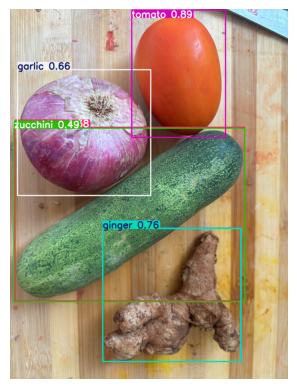

True

In [ ]:
image_path = "demo.jpeg"
image = cv2.imread(image_path)

results = model(image, conf=0.25)

for result in results:

    annotated_image = result.plot()  # plot detections on the image
    plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

cv2.imwrite("annotated_mixed_vegs.jpg", annotated_image)

In [ ]:

detected_ingredients = list(set(model.names[int(i)] for i in results[0].boxes.cls))

print("Detected Ingredients:", detected_ingredients)


Detected Ingredients: ['ginger', 'tomato', 'carrot', 'cucumber', 'garlic', 'zucchini']


In [ ]:
from google.colab import files

# Upload kaggle.json manually
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nirulaishram","key":"5a51d8942a562a9561ce4ec99d08696a"}'}

In [ ]:

import os
import shutil

os.makedirs("/root/.kaggle", exist_ok=True)
shutil.move("kaggle.json", "/root/.kaggle/")
os.chmod("/root/.kaggle/kaggle.json", 600)

In [ ]:
!kaggle datasets download -d shuyangli94/food-com-recipes-and-user-interactions


Dataset URL: https://www.kaggle.com/datasets/shuyangli94/food-com-recipes-and-user-interactions
License(s): copyright-authors


In [ ]:
import zipfile

with zipfile.ZipFile("food-com-recipes-and-user-interactions.zip", "r") as zip_ref:
    zip_ref.extractall("food_dataset")


In [ ]:
os.listdir("food_dataset")


['ingr_map.pkl',
 'RAW_recipes.csv',
 'interactions_validation.csv',
 'PP_users.csv',
 'interactions_train.csv',
 'interactions_test.csv',
 'RAW_interactions.csv',
 'PP_recipes.csv']

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/food_dataset/RAW_recipes.csv")

In [ ]:
data.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [ ]:

def find_matching_recipes(detected_list, recipe_ingredients):
    common_ingredients = set(detected_list) & set(recipe_ingredients)
    return len(common_ingredients) >= 3, list(common_ingredients)



In [ ]:
import ast

data["ingredients"] = data["ingredients"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


def get_match_percentage(recipe_ingredients, detected_list):
    if not isinstance(recipe_ingredients, list):
        return 0, []
    common_ingredients = set(detected_list) & set(recipe_ingredients)
    match_score = len(common_ingredients)
    match_percentage = (match_score / len(detected_list)) * 100 
    return match_score, match_percentage, list(common_ingredients)



In [ ]:
import pandas as pd
import ast

data["ingredients"] = data["ingredients"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


def get_match_percentage(recipe_ingredients, detected_list):
    if not isinstance(recipe_ingredients, list) or not recipe_ingredients:
        return 0, [], []  
    common_ingredients = list(set(recipe_ingredients) & set(detected_list))
    match_percentage = (len(common_ingredients) / len(recipe_ingredients)) * 100
    missing_ingredients = list(set(recipe_ingredients) - set(detected_list))
    return round(match_percentage, 2), common_ingredients, missing_ingredients


recipe_results = []

for _, row in data.iterrows():
    match_percentage, common_ing, missing_ing = get_match_percentage(row.get("ingredients", []), detected_ingredients)

    if match_percentage >= 50:  # Only consider recipes with at least 50% match
        recipe_results.append({
            "Recipe Name": row["name"],
            "Instructions": row["steps"],
            "Required Ingredients": row["ingredients"],
            "Common Ingredients": common_ing,
            "Grocery List (Missing Ingredients)": missing_ing,
            "Match %": match_percentage  
        })

recipe_results = sorted(recipe_results, key=lambda x: x["Match %"], reverse=True)

top_recipes = recipe_results[:3] if recipe_results else []

if not top_recipes:
    print("❌ No recipe found")
else:
    for index, row in enumerate(top_recipes, start=1):
        print(f"🔹 **Top {index} Recipe: {row['Recipe Name']}** (Match: {row['Match %']}%)")
        print(f"📌 **Instructions:** {row['Instructions']}")
        print(f"✅ **Required Ingredients:** {row['Required Ingredients']}")
        print(f"🔥 **Common Ingredients Detected:** {row['Common Ingredients']}")
        print(f"🛒 **Grocery List (Missing Ingredients):** {row['Grocery List (Missing Ingredients)']}")
        print("-" * 80)


🔹 **Top 1 Recipe: replenishing green juice  for your juicer** (Match: 66.67%)
📌 **Instructions:** ['1', 'juice apples , cucumber and ginger', '2', 'pour into glass and enjoy !']
✅ **Required Ingredients:** ['apples', 'cucumber', 'ginger']
🔥 **Common Ingredients Detected:** ['ginger', 'cucumber']
🛒 **Grocery List (Missing Ingredients):** ['apples']
--------------------------------------------------------------------------------
🔹 **Top 2 Recipe: barbecued zucchini two ingredients** (Match: 50.0%)
📌 **Instructions:** ['cut zucchini lengthwise into 1 / 2 to 3 / 8 inch thick slices', 'place in oval casserole dish and add dressing', 'flip slices around to coat with dressing', 'cook directly on outdoor barbecue on medium heat for approximately 8-10 minutes or until zucchini is golden with grill marks', 'baste frequently with leftover dressing , turning often']
✅ **Required Ingredients:** ['zucchini', 'italian dressing']
🔥 **Common Ingredients Detected:** ['zucchini']
🛒 **Grocery List (Missin